In [1]:
#Librerías 
import math
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
from sklearn.mixture import GaussianMixture 
from mpl_toolkits.mplot3d import Axes3D



In [2]:
#import dataset
df = pd.read_csv("/work/minute_weather.csv", encoding = "ISO-8859-1")
display(df.head())


,rowID,hpwren_timestamp,air_pressure,air_temp,avg_wind_direction,avg_wind_speed,max_wind_direction,max_wind_speed,min_wind_direction,min_wind_speed,rain_accumulation,rain_duration,relative_humidity
0,0,2011-09-10 00:00:49,912.3,64.76,97.0,1.2,106.0,1.6,85.0,1.0,NaN,NaN,60.5
1,1,2011-09-10 00:01:49,912.3,63.86,161.0,0.8,215.0,1.5,43.0,0.2,0.0,0.0,39.9
2,2,2011-09-10 00:02:49,912.3,64.22,77.0,0.7,143.0,1.2,324.0,0.3,0.0,0.0,43.0
3,3,2011-09-10 00:03:49,912.3,64.40,89.0,1.2,112.0,1.6,12.0,0.7,0.0,0.0,49.5
4,4,2011-09-10 00:04:49,912.3,64.40,185.0,0.4,260.0,1.0,100.0,0.1,0.0,0.0,58.8


### Task 1  - K means 

In [3]:
df.shape

(1587257, 13)

In [4]:
df_s = df[(df['rowID'] % 10) == 0]
df_s.shape

(158726, 13)

In [5]:
#Eliminar data con valores vacios
del df_s['rain_accumulation']
del df_s['rain_duration']

In [6]:
rows_before = df_s.shape[0]
df_s = df_s.dropna()
rows_after = df_s.shape[0]

In [7]:
#features para cluster
#Cluster = ['air_pressure', 'air_temp', 'avg_wind_direction', 'avg_wind_speed', 'max_wind_direction', 
#        'max_wind_speed','relative_humidity']
Cluster = ['air_pressure', 'air_temp', 'relative_humidity']
select_c = df_s[Cluster]
X = StandardScaler().fit_transform(select_c)

In [8]:
#Extraido de: https://medium.com/analytics-vidhya/how-to-determine-the-optimal-k-for-k-means-708505d204eb
def calculate_WSS(points, kmax):
    sse = []
    for k in range(1, kmax+1):
        kmeans = KMeans(n_clusters = k).fit(points)
        centroids = kmeans.cluster_centers_
        pred_clusters = kmeans.predict(points)
        curr_sse = 0
    
        # calculate square of Euclidean distance of each point from its cluster center and add to current WSS
        for i in range(len(points)):
            curr_center = centroids[pred_clusters[i]]
            curr_sse += (points[i, 0] - curr_center[0]) ** 2 + (points[i, 1] - curr_center[1]) ** 2
      
        sse.append(curr_sse)
    return sse

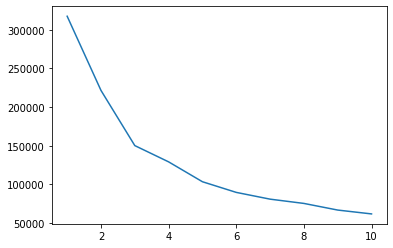

In [9]:
sse = calculate_WSS(X, 10)

fig = plt.figure()
ax = plt.axes()

x_plot = list(range(1,11))

ax.plot(x_plot, sse)

Al utilizar el método del codo podemos observar que el número de clusters más apropiado es de 5 por lo que ese número se utilizará para el modelo de kmeans.

In [18]:
num_clusters = 5
kmeans = KMeans(n_clusters=num_clusters)
model = kmeans.fit(X)
print("model\n", model)

model
 KMeans(n_clusters=5)


In [19]:
identified_clusters = kmeans.fit_predict(X)
identified_clusters

array([3, 3, 3, ..., 1, 1, 1], dtype=int32)

/shared-libs/python3.7/py-core/lib/python3.7/site-packages/ipykernel_launcher.py:3: MatplotlibDeprecationWarning: Axes3D(fig) adding itself to the figure is deprecated since 3.4. Pass the keyword argument auto_add_to_figure=False and use fig.add_axes(ax) to suppress this warning. The default value of auto_add_to_figure will change to False in mpl3.5 and True values will no longer work in 3.6.  This is consistent with other Axes classes.
  This is separate from the ipykernel package so we can avoid doing imports until


Text(0.5, 0, 'Humedad relativa')

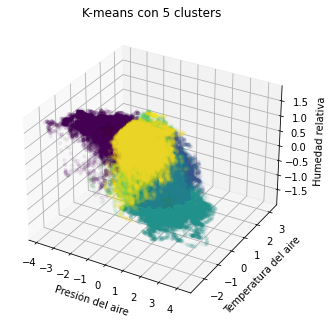

In [20]:
clusters = model.predict(X)
fig = plt.figure(1)
ax = Axes3D(fig)
ax.scatter(X[:, 0], X[:, 1], X[:, 2],s=10,c=kmeans.labels_.astype(float), alpha=0.05)
ax.scatter(kmeans.cluster_centers_[:,0],kmeans.cluster_centers_[:,1], kmeans.cluster_centers_[:,2], s=300, c="yellow",marker="*", edgecolor="k", label="Centroides")
ax.set_title("K-means con 5 clusters")
ax.set_xlabel("Presión del aire")
ax.set_ylabel("Temperatura del aire")
ax.set_zlabel("Humedad relativa")

## Task 2  - Mixture-Models

In [13]:
rows_before = df_s.shape[0]
df_s = df_s.dropna()
rows_after = df_s.shape[0]

In [14]:
#features para cluster
#Cluster = ['air_pressure', 'air_temp', 'avg_wind_direction', 'avg_wind_speed', 'max_wind_direction', 
#        'max_wind_speed','relative_humidity']
Cluster = ['air_pressure', 'air_temp', 'relative_humidity']
select_c = df_s[Cluster]
X = StandardScaler().fit_transform(select_c)

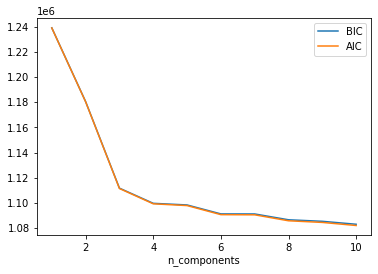

In [15]:
n_components = np.arange(1, 11)
models = [GaussianMixture(n, covariance_type='full', random_state=0).fit(X)
          for n in n_components]

plt.plot(n_components, [m.bic(X) for m in models], label='BIC')
plt.plot(n_components, [m.aic(X) for m in models], label='AIC')
plt.legend(loc='best')
plt.xlabel('n_components');

/shared-libs/python3.7/py-core/lib/python3.7/site-packages/ipykernel_launcher.py:4: MatplotlibDeprecationWarning: Axes3D(fig) adding itself to the figure is deprecated since 3.4. Pass the keyword argument auto_add_to_figure=False and use fig.add_axes(ax) to suppress this warning. The default value of auto_add_to_figure will change to False in mpl3.5 and True values will no longer work in 3.6.  This is consistent with other Axes classes.
  after removing the cwd from sys.path.


Text(0.5, 0, 'Humedad relativa')

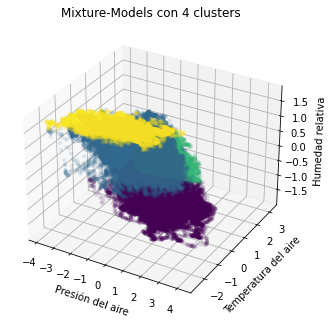

In [21]:
gmm = GaussianMixture(n_components=4).fit(X)
labels = gmm.predict(X)
fig = plt.figure(1)
ax = Axes3D(fig)
ax.scatter(X[:, 0], X[:, 1], X[:, 2], c=labels, s=10, alpha=0.1, cmap='viridis')
ax.set_title("Mixture-Models con 4 clusters")
ax.set_xlabel("Presión del aire")
ax.set_ylabel("Temperatura del aire")
ax.set_zlabel("Humedad relativa")

<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=1270734b-9f21-4c77-8d70-592faca90f10' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>